In [1]:
import pickle as pkl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import cartopy

In [51]:
infile = open('real_estate_data_frame','rb')
frame = pkl.load(infile)
infile.close()

In [3]:
frame

,city,district,localization_y,localization_x,area,sewers,road,fence,water,electricity,gas,price
0,Bełdów-Krzywa Wieś,zgierski,51.835925,19.193010,1004.0,brak,utwardzana,brak,wodociąg w drodze,w drodze,brak,90360.0
1,Stanisławów Nowy,pabianicki,51.801330,19.189772,1200.0,brak,utwardzana,brak,brak,brak,brak,84000.0
2,Julianowo,szczycieński,53.723500,20.867400,1262.0,brak,utwardzana,brak,własne ujęcie/studnia,brak,brak,88340.0
3,Nadarzyn,pruszkowski,52.094000,20.807400,950.0,brak,utwardzana,brak,brak,brak,brak,295000.0
4,Rusiec,pruszkowski,52.065800,20.803900,1160.0,brak,utwardzana,brak,brak,brak,brak,255200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7485,Cholerzyn,krakowski,50.058603,19.773954,1670.0,brak,polna,brak,brak,brak,brak,333000.0
7486,Mogilany,krakowski,49.939618,19.889479,2000.0,brak,polna,brak,brak,brak,brak,360000.0
7487,Nowa Wieś Szlachecka,krakowski,50.026720,19.700051,4400.0,szambo,polna,brak,brak,brak,brak,160000.0
7488,Czernichów,krakowski,49.987773,19.679529,4400.0,brak,polna,brak,brak,brak,brak,440000.0


In [4]:
frame.describe().transpose().loc[['area','price']]

,count,mean,std,min,25%,50%,75%,max
area,7490.0,3246.751435,6150.670751,250.0,1062.25,1532.0,2970.0,97003.0
price,7490.0,488738.182216,858096.456476,20000.0,114000.00,210000.0,469750.0,10000000.0


<AxesSubplot:title={'center':'Price distribution up to 1.000.000 PLN'}, xlabel='price', ylabel='Count'>

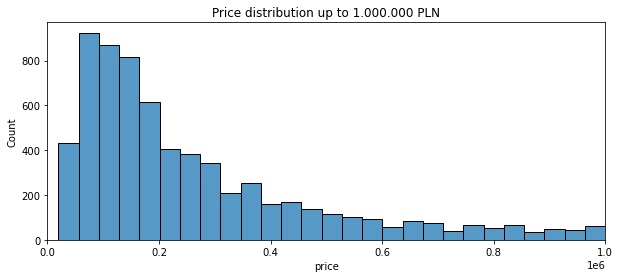

In [5]:
plt.figure(figsize=(10,4))

plt.xlim(0,1000000)
plt.title('Price distribution up to 1.000.000 PLN')
sns.histplot(frame['price'])

<AxesSubplot:title={'center':'Price distribution above 1.000.000 PLN'}, xlabel='price', ylabel='Count'>

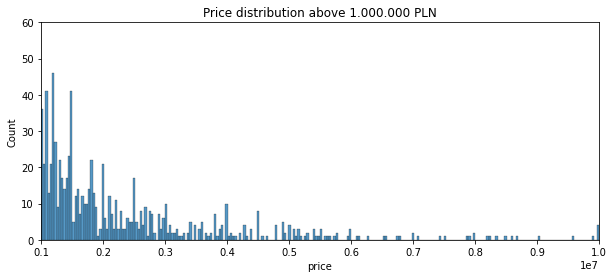

In [6]:
plt.figure(figsize=(10,4))
plt.xlim(1000000,10000000)
plt.ylim(0,60)
plt.title('Price distribution above 1.000.000 PLN')
sns.histplot(frame['price'])

<AxesSubplot:title={'center':'Area distribution up to 20.000 $m^{2}$'}, xlabel='area', ylabel='Count'>

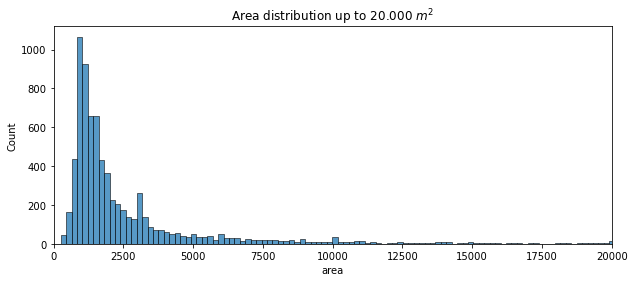

In [7]:
plt.figure(figsize=(10,4))
plt.xlim(0,20000)
plt.title('Area distribution up to 20.000 ' + r'$m^{2}$')
sns.histplot(frame['area'])

<AxesSubplot:title={'center':'Area vs. price'}, xlabel='area', ylabel='price'>

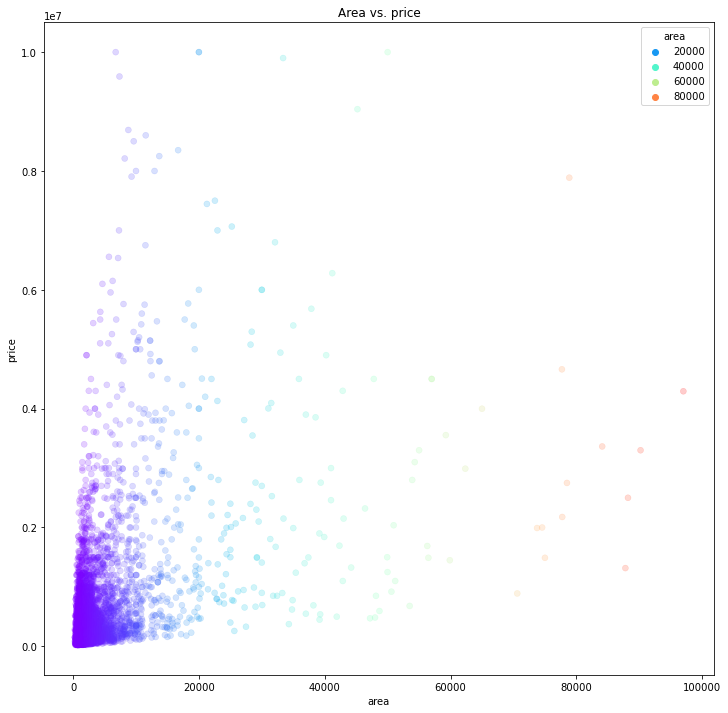

In [8]:
plt.figure(figsize=(12,12))
plt.title('Area vs. price')
# plt.xlim(0,10000)
# plt.ylim(0,100000)
sns.scatterplot(x='area', y='price',
                data=frame, hue='area',
                palette='rainbow', edgecolor=None,alpha=0.2)

In [9]:
# plt.figure(figsize=(12,12))

# ax = plt.axes(projection=cartopy.crs.PlateCarree())
# ax.add_feature(cartopy.feature.LAND)
# ax.add_feature(cartopy.feature.OCEAN)
# ax.add_feature(cartopy.feature.COASTLINE)
# ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
# ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
# ax.add_feature(cartopy.feature.RIVERS)

# plt.title('Map with prices below 1.000.000 PLN')
# sns.scatterplot(x='localization_x', y='localization_y',
#                 data=frame[frame['price']<1000000], hue='price',
#                 palette='rainbow', edgecolor=None,alpha=0.2)

In [69]:
px.set_mapbox_access_token('pk.eyJ1IjoicGlvdHIzMTQxNSIsImEiOiJja2lnN3FpNWgwNTVpMnVvMzU2cmRsMDkzIn0.l6MuyumYkzsfBxYva6UM5w')
fig = px.scatter_mapbox(frame[frame['price']<1000000],
                        lat=frame[frame['price']<1000000].localization_y,
                        lon=frame[frame['price']<1000000].localization_x,
                        hover_name="city",
                        zoom=5.1,
                        color="price",
#                         size="area",
                        size_max=20,
                        opacity=0.5,
                        color_continuous_scale=px.colors.sequential.Turbo)
fig.update_layout(mapbox_style="light")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [11]:
# plt.figure(figsize=(12,12))

# ax = plt.axes(projection=cartopy.crs.PlateCarree())
# ax.add_feature(cartopy.feature.LAND)
# ax.add_feature(cartopy.feature.OCEAN)
# ax.add_feature(cartopy.feature.COASTLINE)
# ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
# ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
# ax.add_feature(cartopy.feature.RIVERS)

# plt.title('Map with prices above 1.000.000 PLN')
# sns.scatterplot(x='localization_x', y='localization_y',
#                 data=frame[frame['price']>=1000000], hue='price',
#                 palette='rainbow', edgecolor=None,alpha=0.2)

In [75]:
px.set_mapbox_access_token('pk.eyJ1IjoicGlvdHIzMTQxNSIsImEiOiJja2lnN3FpNWgwNTVpMnVvMzU2cmRsMDkzIn0.l6MuyumYkzsfBxYva6UM5w')
fig = px.scatter_mapbox(frame[frame['price']>1000000],
                        lat=frame[frame['price']>1000000].localization_y,
                        lon=frame[frame['price']>1000000].localization_x,
                        hover_name="city",
                        zoom=5.1,
                        color="price",
#                         size="area",
                        size_max=20,
                        opacity=0.5,
                        color_continuous_scale=px.colors.sequential.Turbo)
fig.update_layout(mapbox_style="light")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [60]:
frame['price_of_sqm'] = frame['price']/frame['area']

In [65]:
px.set_mapbox_access_token('pk.eyJ1IjoicGlvdHIzMTQxNSIsImEiOiJja2lnN3FpNWgwNTVpMnVvMzU2cmRsMDkzIn0.l6MuyumYkzsfBxYva6UM5w')
fig = px.scatter_mapbox(frame,
                        lat=frame.localization_y,
                        lon=frame.localization_x,
                        hover_name="city",
                        zoom=5.1,
                        color="price_of_sqm",
#                         size="area",
                        size_max=20,
                        opacity=0.5,
                        color_continuous_scale=px.colors.sequential.Turbo)
fig.update_layout(mapbox_style="light")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

<AxesSubplot:>

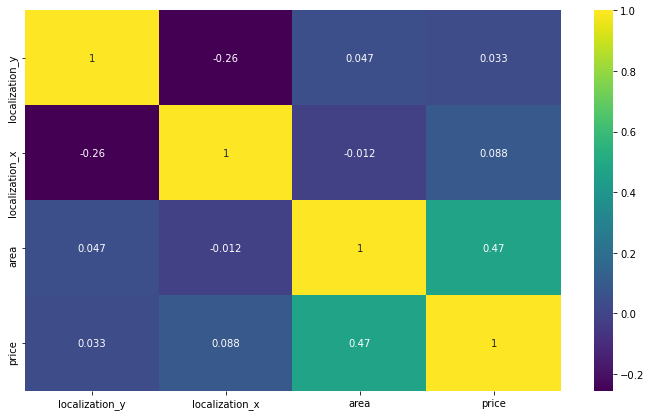

In [13]:
plt.figure(figsize=(12,7))
sns.heatmap(frame.corr(),annot=True,cmap='viridis')

In [49]:
import plotly.graph_objects as go
px.set_mapbox_access_token('pk.eyJ1IjoicGlvdHIzMTQxNSIsImEiOiJja2lnN3FpNWgwNTVpMnVvMzU2cmRsMDkzIn0.l6MuyumYkzsfBxYva6UM5w')
fig = px.scatter_mapbox(frame[frame['price']<1000000],
                        lat=frame[frame['price']<1000000].localization_y,
                        lon=frame[frame['price']<1000000].localization_x,
                        hover_name="city",
                        zoom=5.1,
                        color="price",
                        size_max=20,
                        opacity=0.2,
                        color_continuous_scale=px.colors.sequential.Turbo
                       )
fig.update_layout(mapbox_style="light")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

y_min = frame['localization_y'].min()
y_max = frame['localization_y'].max()
x_min = frame['localization_x'].min()
x_max = frame['localization_x'].max()
buckets = 15
y_bucket = (y_max - y_min) / buckets
x_bucket = (x_max - x_min) / buckets

for i in range(buckets+1):
    x = x_min + i * x_bucket
    fig.add_trace(go.Scattermapbox(
    mode = "lines",
    lon = [x, x],
    lat = [y_min, y_max],
    line=dict(width=2, color="#8CCE89"),
    name=''
    ))
    
for i in range(buckets+1):
    y = y_min + i * y_bucket
    fig.add_trace(go.Scattermapbox(
    mode = "lines",
    lon = [x_min, x_max],
    lat = [y, y],
    line=dict(width=2, color="#8CCE89"),
    name=''
    ))
    
fig.show()